In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Leer Data

In [94]:
data = pd.read_csv("credit_risk_dataset.csv")
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Ver datos nulos

In [95]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Eliminar datos nulos

In [96]:
data.dropna(inplace=True)

Gráficos de dispersión

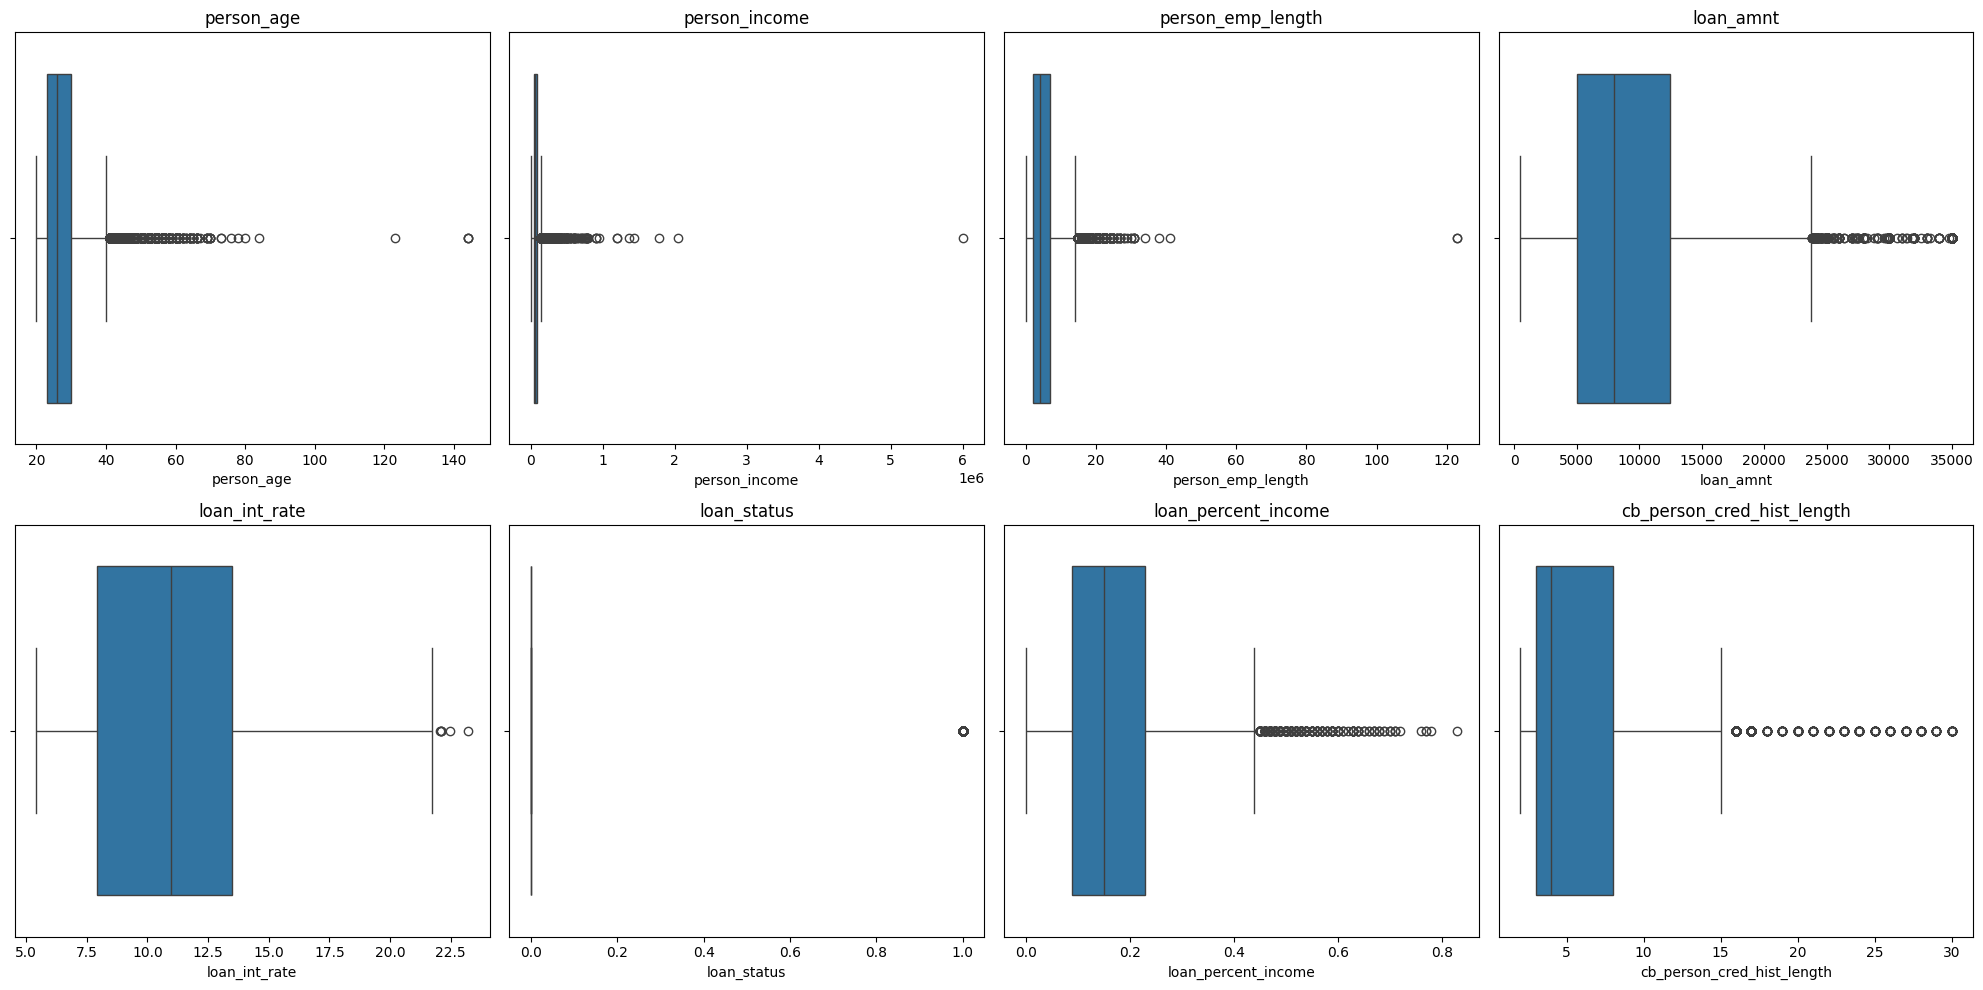

In [97]:
col_numericas = data.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(20, 10))

for i in range(len(col_numericas)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=data[col_numericas[i]])
    plt.title(col_numericas[i])

plt.tight_layout()
plt.show()

Eliminar valores atípicos

In [98]:
#Filtrar data
def iqr(data, column): #Definir función
    q3 = data[column].quantile(0.75) #3er cuartil
    q1 = data[column].quantile(0.25) #1er cuartil
    superior_limit = q3 + 1.5*(q3 - q1)
    inferior_limit = q1 - 1.5*(q3 - q1)
    return data[(data[column] < superior_limit) & (data[column] > inferior_limit)] #Selects data

In [99]:
#Aplicar función solo a  columnas numéricas
for col in ["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]:
    data = iqr(data, col) 

Gráficos de dispersión después de eliminar outliers

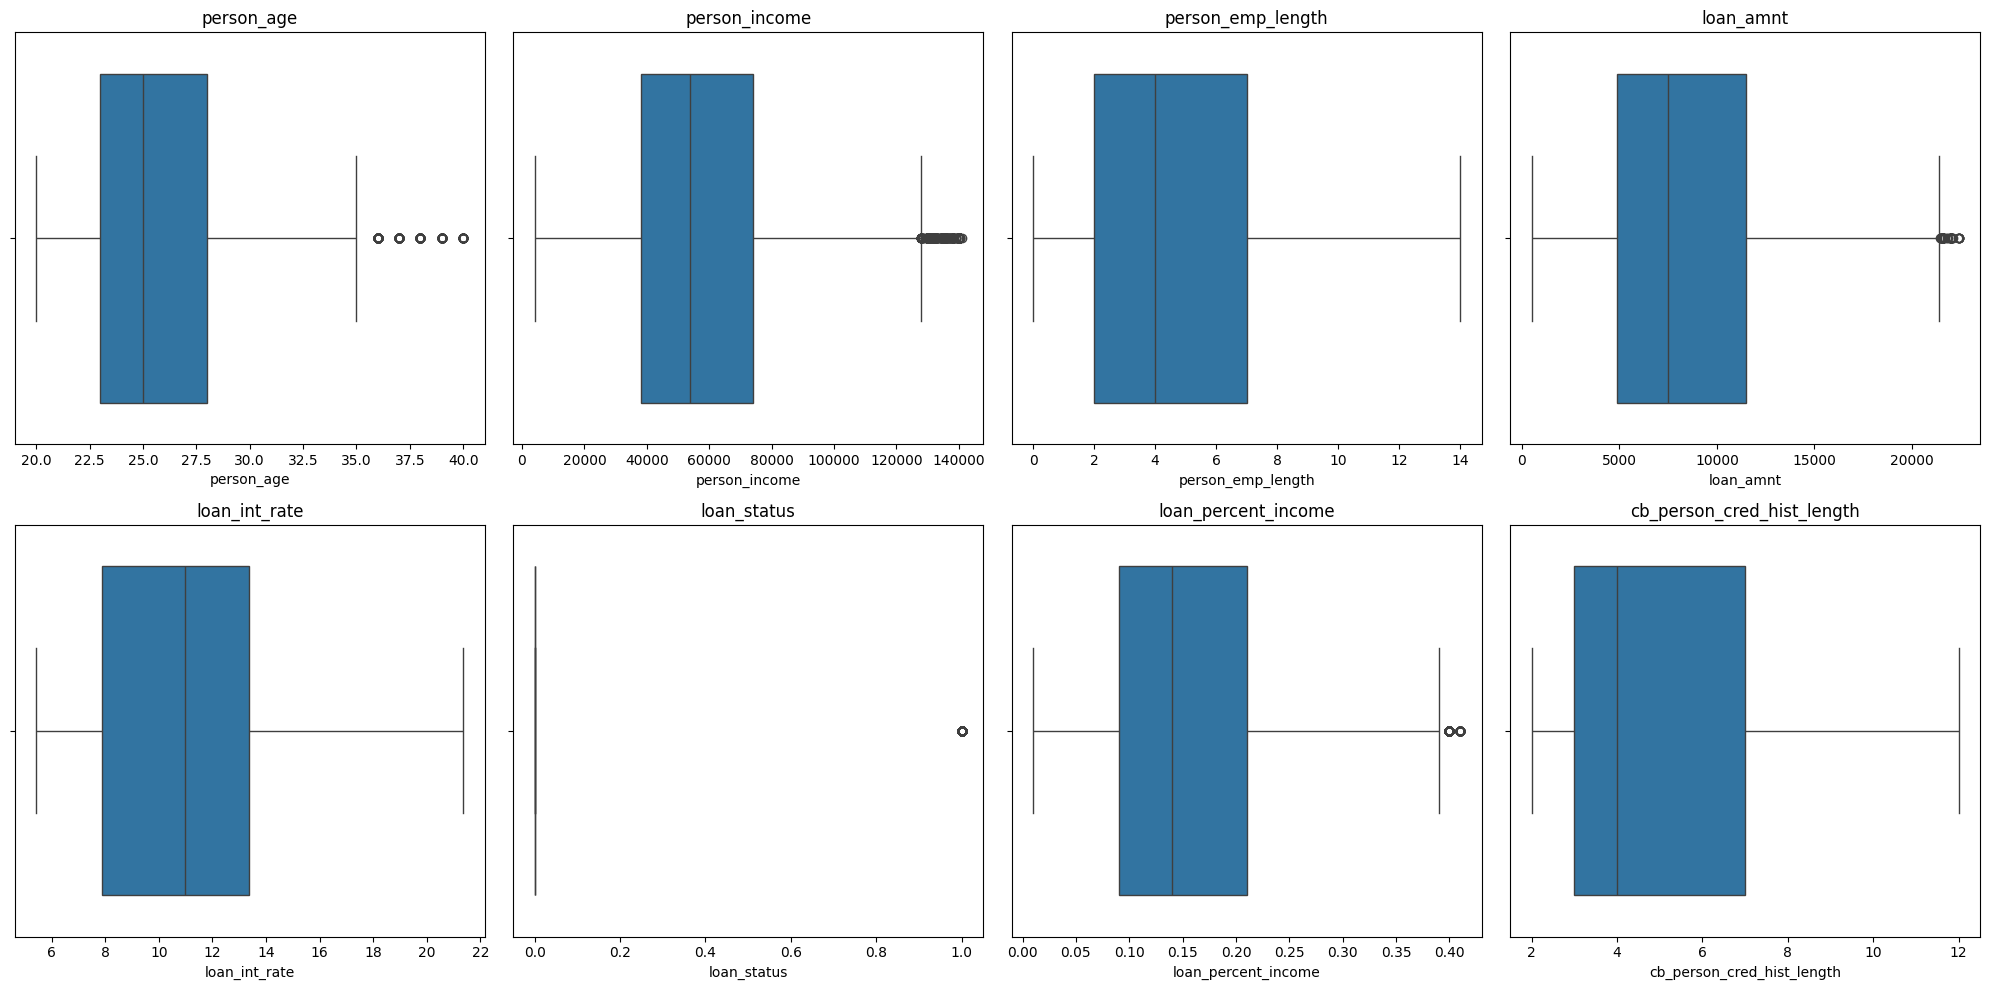

In [100]:
#col_numericas = data.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(20, 10))
for i in range(len(col_numericas)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=data[col_numericas[i]])
    plt.title(col_numericas[i])

plt.tight_layout()
plt.show()

Pasar variables categóricas a numéricas

In [101]:
from sklearn.preprocessing import LabelEncoder #Llamamos la librería
VC = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"] #Variables categóricas
LE = LabelEncoder() #Creamos LabelEncoder
for i in VC: #Aplicamos LabelEncoder a las variables categóricas
    data[i] = LE.fit_transform(data[i])

Gráfico de balance de clases

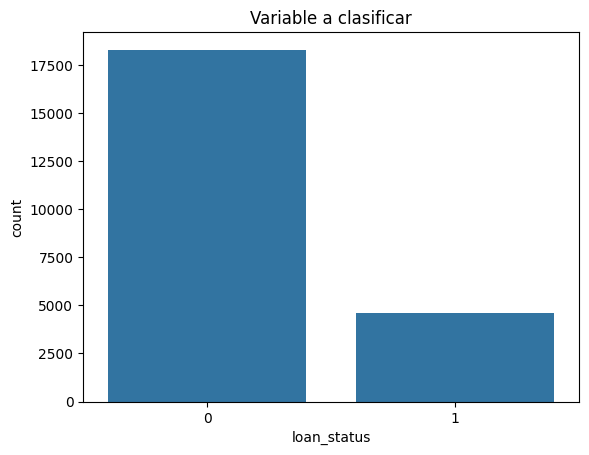

In [102]:
sns.countplot(x = 'loan_status', data = data)
plt.title('Variable a clasificar')
plt.show()
#Hay un desbalance presente indicando que hay mas estados de prestamos pagados que no pagados

Separar variable x e y

In [128]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

Matriz de correlación

Separamos datos en entrenamiento y testeo

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
# Crear modelo Random Forest
modeloRF = RandomForestClassifier(
    n_estimators=300, #50 arboles
    max_depth=50, #Profundidad de 25
    min_samples_leaf=1, #Minimo de 1 muestra por hoja
    class_weight='balanced', #Se balancean las clases
    random_state=42
)

Entrenar modelo

In [131]:
# Entrenar el modelo
modeloRF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=300,
                       random_state=42)

Métricas de desempeño con validación cruzada

In [132]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Predicciones con validación cruzada
y_pred = cross_val_predict(modeloRF, X, y, cv=10)

# Métricas
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18300
           1       0.92      0.65      0.76      4584

    accuracy                           0.92     22884
   macro avg       0.92      0.82      0.86     22884
weighted avg       0.92      0.92      0.91     22884



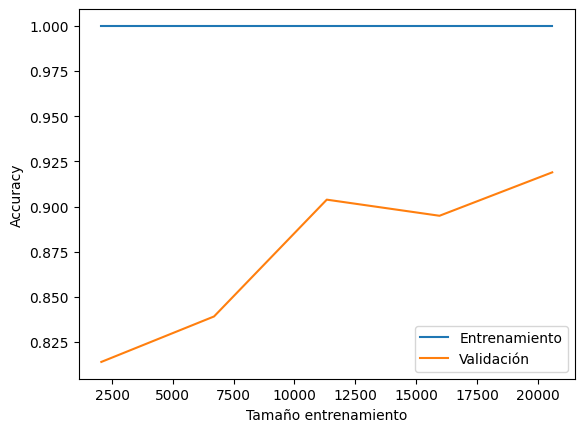

In [133]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(modeloRF, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1,1,5))

plt.plot(train_sizes, train_scores.mean(axis=1), label='Entrenamiento')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validación')
plt.xlabel('Tamaño entrenamiento')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Presencia de overfitting, ya que la curva de entrenamiento es mayor que la de validación


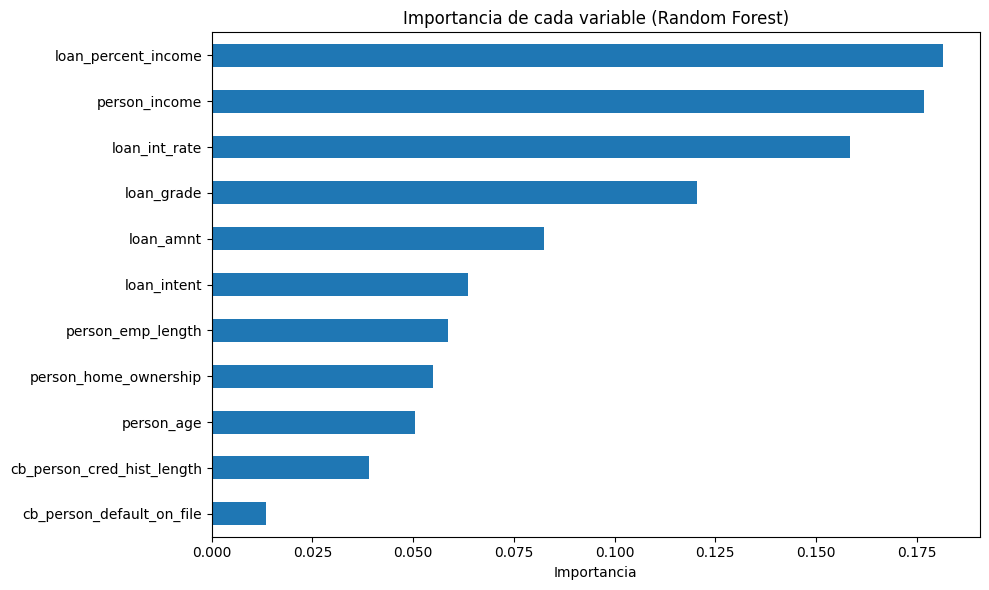

In [135]:
importancia_variables = pd.Series(modeloRF.feature_importances_, index=X.columns)
importancia_variables = importancia_variables.sort_values()

#Gráfico,
plt.figure(figsize=(10, 6))
importancia_variables.plot(kind='barh')
plt.title("Importancia de cada variable (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

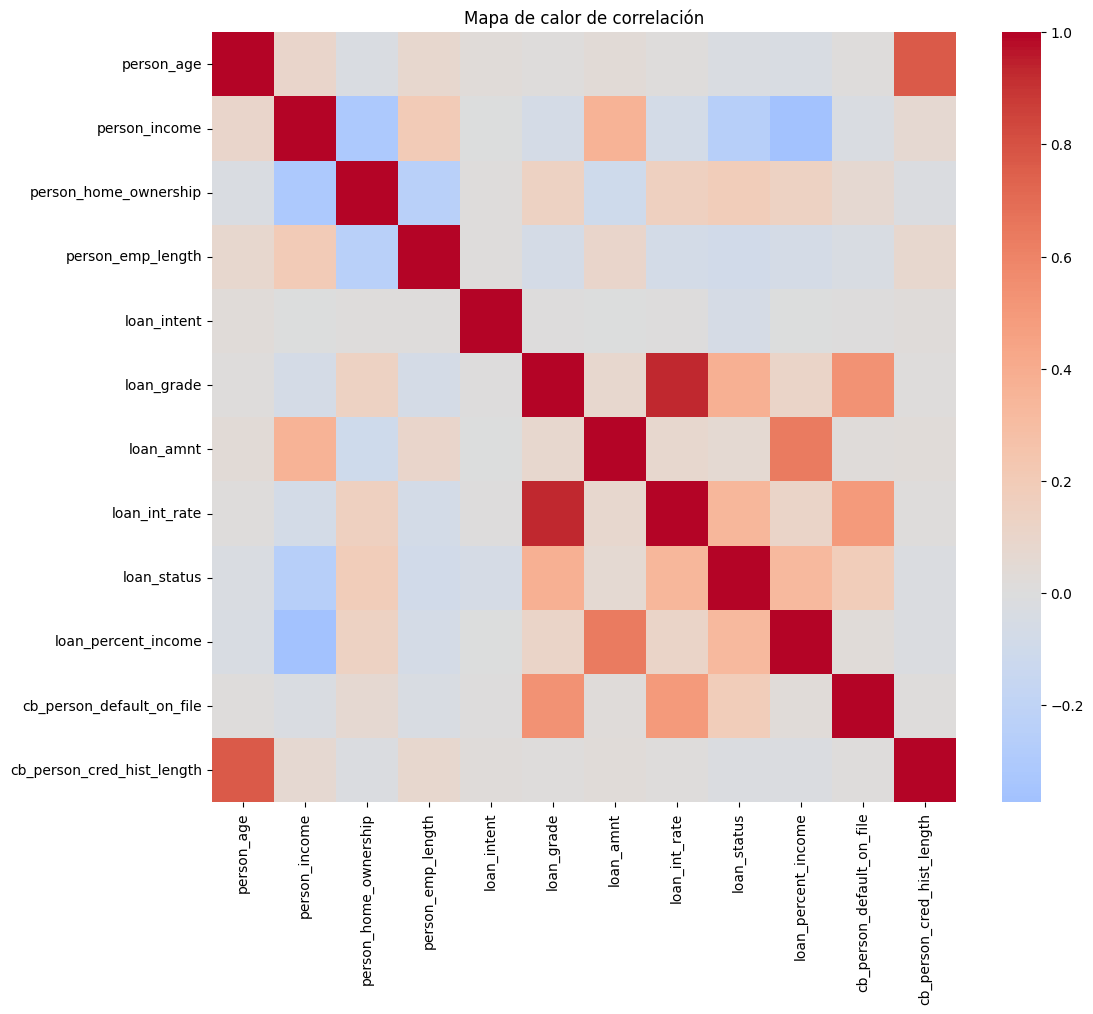

In [ ]:
#Calcular matriz de correlación,
#numeric_data = data.select_dtypes(include='number')
CM = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(CM, annot=False, cmap='coolwarm', center=0)
plt.title("Mapa de calor de correlación")
plt.show()

Eliminamos variables menos influyentes

In [138]:
X = data.drop(['loan_status', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_grade'], axis=1)
y = data['loan_status']

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
from sklearn.ensemble import RandomForestClassifier
# Crear modelo Random Forest
modeloRF = RandomForestClassifier(
    n_estimators=30, #50 arboles
    max_depth=10, #Profundidad de 25
    min_samples_leaf=1, #Minimo de 1 muestra por hoja
    class_weight='balanced', #Se balancean las clases
    random_state=42
)

In [141]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Predicciones con validación cruzada
y_pred = cross_val_predict(modeloRF, X, y, cv=10)

# Métricas
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     18300
           1       0.64      0.68      0.66      4584

    accuracy                           0.86     22884
   macro avg       0.78      0.79      0.79     22884
weighted avg       0.86      0.86      0.86     22884



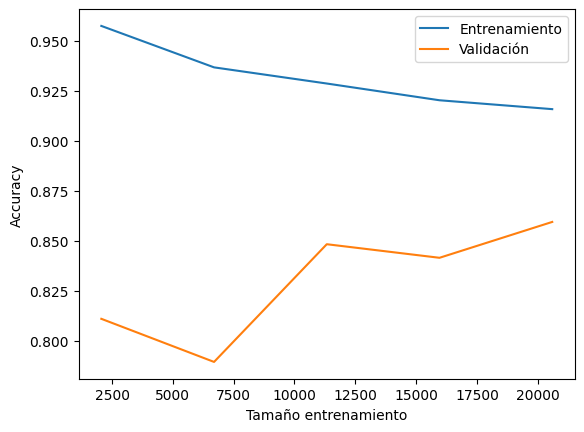

In [142]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(modeloRF, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1,1,5))

plt.plot(train_sizes, train_scores.mean(axis=1), label='Entrenamiento')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validación')
plt.xlabel('Tamaño entrenamiento')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Presencia de overfitting, ya que la curva de entrenamiento es mayor que la de validación


Matriz de confusión

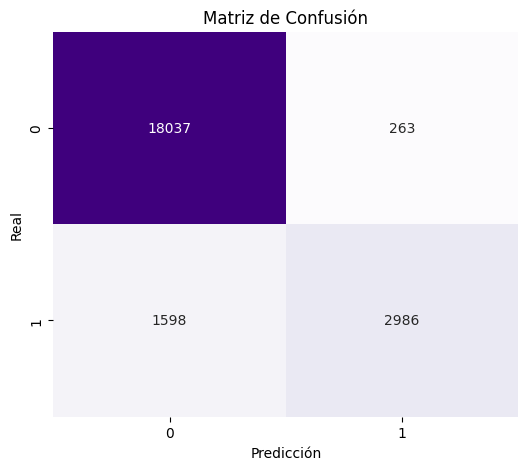

In [ ]:
from sklearn.metrics import confusion_matrix

# Creación de matriz de confusión
MC = confusion_matrix(y, y_pred) 

# Gráfico matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(MC, annot=True, fmt='g', cmap="Purples", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Visualización de un árbol del modelo random forest

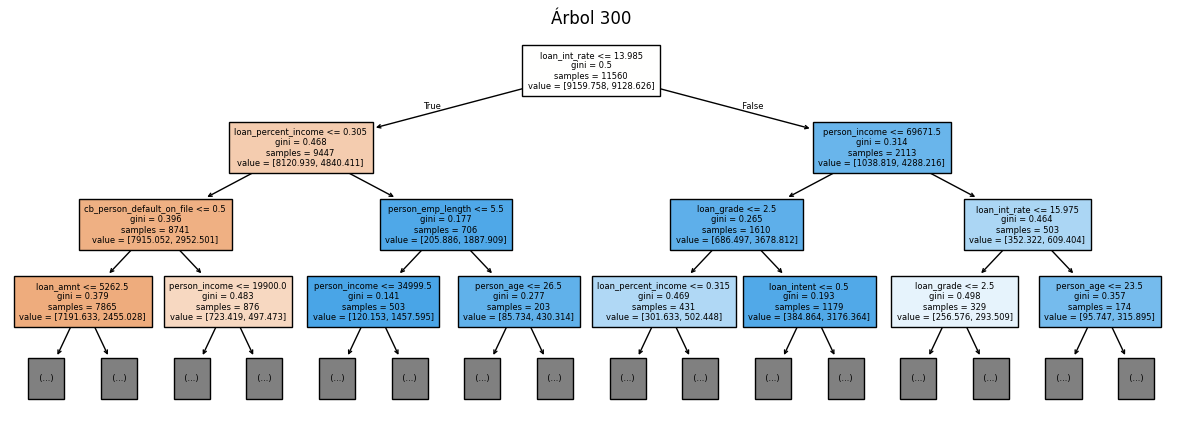

In [ ]:
from sklearn.tree import plot_tree

# Grafico del arbol 300, mostrando una profundidad de 3
plt.figure(figsize=(15, 5))
plot_tree(modeloRF.estimators_[299], feature_names=X.columns, filled=True, max_depth=3, fontsize=6) #Con profundidad de 3 y 300 arboles
plt.title("Árbol 300")
plt.show()